In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify 

In [2]:
def load_scripts():
    df1 = pd.read_csv('./data/simpsons_script_lines.csv', error_bad_lines=False)\
        .sort_values(['episode_id', 'timestamp_in_ms'])\
        .reset_index()
    
    df2 = pd.read_csv('./data/simpsons_episodes.csv', error_bad_lines=False)[['id', 'season']]
    df2.columns = ['episode_id', 'season']

    df3 = pd.merge(df1, df2, how='left', on='episode_id')
    
    return df3


def get_top(df, n_characters):
    # get top characters by line count
    cts = df.raw_character_text.value_counts()
    top = list(cts[:n_characters].index)
    return top


def longest_line(df, character):
    return list(df[np.where(df.raw_character_text==character, True, False)]\
        .sort_values('word_count', ascending=False)['spoken_words'])[0]

In [3]:
df = load_scripts()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [4]:
print(df.shape)
df.head()

(158248, 15)


,index,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,season
0,148751,4,1,3,Homer Simpson: There's no time to be careful.,10000,true,2,2.0,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6.0,1
1,148752,5,1,4,Homer Simpson: We're late.,10000,true,2,2.0,Homer Simpson,Car,We're late.,were late,2.0,1
2,149014,263,1,262,Homer Simpson: Who's Tiny Tim?,1001000,true,2,19.0,Homer Simpson,PERSONNEL OFFICE,Who's Tiny Tim?,whos tiny tim,3.0,1
3,149015,264,1,263,(Simpson Home: int. simpson house - night),1006000,false,NaN,5.0,NaN,Simpson Home,NaN,NaN,NaN,1
4,149016,265,1,264,"Bubbles: (FROM TV) Hey, Moldy, do you think Sa...",1006000,true,29,5.0,Bubbles,Simpson Home,"Hey, Moldy, do you think Santa will be able to...",hey moldy do you think santa will be able to f...,17.0,1


In [11]:
df1 = df.groupby(['episode_id','raw_location_text'])\
    .count()[['id']]\
    .sort_values('id', ascending=False)\
    .reset_index()\
    .groupby('raw_location_text')\
    .agg({'episode_id' : lambda x: len(set(x)), 'id' : 'sum'})\
    .sort_values('id', ascending=False)\
    .reset_index()

In [12]:
print(df1.shape)
df1.head(10)

(4497, 3)


,raw_location_text,episode_id,id
0,Simpson Home,545,35056
1,Springfield Elementary School,264,7092
2,Moe's Tavern,242,4626
3,Springfield Nuclear Power Plant,173,3593
4,Kwik-E-Mart,117,1476
5,First Church of Springfield,81,1416
6,Simpson Living Room,105,1378
7,Springfield Street,152,1334
8,Springfield,165,1314
9,Simpson Car,131,1239


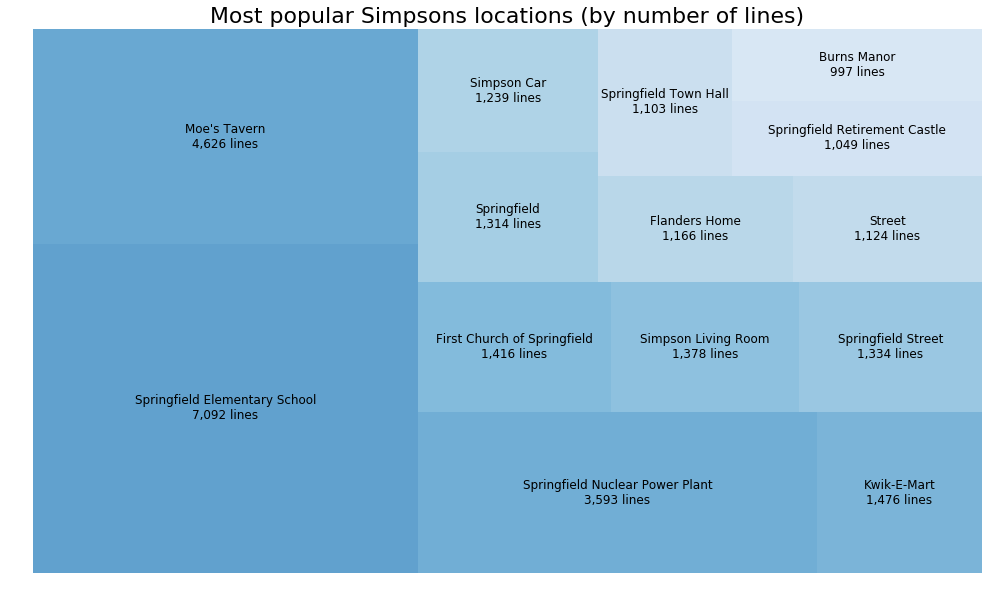

In [35]:
my_values = my_values=[i for i in range(15)][::-1]
cmap = matplotlib.cm.Blues
mini=min(my_values)-5
maxi=max(my_values)+10
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

fig = plt.figure(figsize=(17,10))
squarify.plot(sizes=df1['id'][1:15], 
              label=[f'{x}\n{y:,.0f} lines' for y,x in zip(df1['id'][1:15],
                                                           df1['raw_location_text'][1:15])],
              alpha=.8,
              color=colors,
              text_kwargs={'fontsize':12})
plt.axis('off')
plt.title('Most popular Simpsons locations (by number of lines)', fontsize=22)
plt.savefig('./plots/treemap.png', bbox_inches='tight')
plt.show()